## Etapa 1: Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from sklearn.metrics import mean_absolute_error
torch.__version__

'1.13.1+cu116'

In [ ]:
torch.manual_seed(123)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Etapa 2: Base de dados

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Deep Learing de A à Z com PyTorch/Bases/petr4_treinamento.csv')
base = base.dropna()
base_treinamento = base.iloc[:, 1:7].values

In [ ]:
base_treinamento

array([[1.9990000e+01, 2.0209999e+01, 1.9690001e+01, 1.9690001e+01,
        1.8086271e+01, 3.0182600e+07],
       [1.9809999e+01, 2.0400000e+01, 1.9700001e+01, 2.0400000e+01,
        1.8738441e+01, 3.0552600e+07],
       [2.0330000e+01, 2.0620001e+01, 2.0170000e+01, 2.0430000e+01,
        1.8766001e+01, 3.6141000e+07],
       ...,
       [1.5990000e+01, 1.6139999e+01, 1.5980000e+01, 1.6049999e+01,
        1.6017963e+01, 2.3552200e+07],
       [1.6100000e+01, 1.6129999e+01, 1.6000000e+01, 1.6100000e+01,
        1.6067865e+01, 1.9011500e+07],
       [1.6100000e+01, 1.6100000e+01, 1.6100000e+01, 1.6100000e+01,
        1.6067865e+01, 0.0000000e+00]])

In [ ]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [ ]:
normalizador = MinMaxScaler(feature_range = (0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [ ]:
base_treinamento_normalizada

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       ...,
       [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
        0.03369652],
       [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
        0.02720006],
       [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
        0.        ]])

In [ ]:
X = []
y = []
for i in range(90, 1242):
    X.append(base_treinamento_normalizada[i-90:i, 0:6])
    y.append(base_treinamento_normalizada[i, 0])
X, y = np.array(X), np.array(y)

In [ ]:
X[0]

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       [0.78875969, 0.7949588 , 0.81013311, 0.77996075, 0.70144373,
        0.04015963],
       [0.77083338, 0.77363063, 0.78505624, 0.75147351, 0.67522435,
        0.0416214 ],
       [0.74806197, 0.75618037, 0.78505624, 0.76031438, 0.68336137,
        0.03485382],
       [0.75436047, 0.76490543, 0.78915051, 0.76768177, 0.69014234,
        0.02507502],
       [0.75823643, 0.76442079, 0.79733884, 0.77013751, 0.6924025 ,
        0.0260728 ],
       [0.76598837, 0.77411537, 0.79682707, 0.76227897, 0.68516964,
        0.0404927 ],
       [0.76598837, 0.77411537, 0.79682707, 0.76719061, 0.68969016,
        0.0423977 ],
       [0.76017437, 0.75714973, 0.79222108, 0.76817293, 0.69059437,
        0.02401858],
       [0.75872098, 0

In [ ]:
y[0]

0.7611434108527131

In [ ]:
X[1]

array([[0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       [0.78875969, 0.7949588 , 0.81013311, 0.77996075, 0.70144373,
        0.04015963],
       [0.77083338, 0.77363063, 0.78505624, 0.75147351, 0.67522435,
        0.0416214 ],
       [0.74806197, 0.75618037, 0.78505624, 0.76031438, 0.68336137,
        0.03485382],
       [0.75436047, 0.76490543, 0.78915051, 0.76768177, 0.69014234,
        0.02507502],
       [0.75823643, 0.76442079, 0.79733884, 0.77013751, 0.6924025 ,
        0.0260728 ],
       [0.76598837, 0.77411537, 0.79682707, 0.76227897, 0.68516964,
        0.0404927 ],
       [0.76598837, 0.77411537, 0.79682707, 0.76719061, 0.68969016,
        0.0423977 ],
       [0.76017437, 0.75714973, 0.79222108, 0.76817293, 0.69059437,
        0.02401858],
       [0.75872098, 0.75908871, 0.79222108, 0.76178781, 0.68471746,
        0.02821315],
       [0.75581391, 0

In [ ]:
y[1]

0.7611434108527131

In [ ]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

In [ ]:
dataset = torch.utils.data.TensorDataset(X, y)
loader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle = True)

## Etapa 3: Construção da rede neural recorrente

In [ ]:
class regressor_LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        
        # O primeiro input_size é o número de dimensões que cada dado tem em 
        # cada timestep. Nesse caso, são 6 dimensões, uma para cada variável.
        self.lstm1 = nn.LSTM(input_size = 6, hidden_size = 100)
        self.lstm2 = nn.LSTM(100, 50)
        self.lstm3 = nn.LSTM(50, 50, dropout = 0.3, num_layers = 2)
        self.dropout = nn.Dropout(p = 0.3)
        self.linear = nn.Linear(in_features = 50, out_features = 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, X):
        
        X = X.permute(1, 0, 2)
        X, _ = self.lstm1(X)
        X = self.dropout(X)
        X, _ = self.lstm2(X)
        X = self.dropout(X)
        X, _ = self.lstm3(X)
        
        X = X[-1]
        X = self.dropout(X)
        X = self.linear(X)
        X = self.sigmoid(X)
       
        return X

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [ ]:
regressor = regressor_LSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(regressor.parameters())

In [ ]:
regressor.to(device)

regressor_LSTM(
  (lstm1): LSTM(6, 100)
  (lstm2): LSTM(100, 50)
  (lstm3): LSTM(50, 50, num_layers=2, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (linear): Linear(in_features=50, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

## Etapa 4: Treinamento do modelo

In [ ]:
# Variáveis para o callback
ES_MIN_DELTA = 1e-10
ES_PATIENCE = 10
RLR_FACTOR = 0.2
RLR_PATIENCE = 5

# Inicializando o custo inicial para usar nos callbacks
min_loss = np.inf

In [ ]:
for epoch in range(200):
    running_loss = 0.
    running_mae = 0.
          
    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = regressor(inputs)
        outputs = outputs.flatten()
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
    
        running_loss += loss.item()
        mae = mean_absolute_error(labels.detach().cpu().numpy().flatten(), 
                                  outputs.detach().cpu().numpy().flatten())
        running_mae += mae
        
        # Imprimindo os dados referentes a esse loop 
        print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: custo {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader), loss, mae), end = '\r')
    
    # Imprimindo os dados referentes a essa época
    running_loss /= len(loader)
    running_mae /= len(loader)
    print('ÉPOCA {:3d} finalizada: custo {:03.6f} - MAE {:03.6f}     '.format(epoch+1, running_loss, running_mae))
    
    # CALLBACKS
    
    # Salvar o modelo
    
    if running_loss < min_loss:
        print('**Custo reduzido de {:03.6f} para {:03.6f} ... salvando checkpoint'.format(min_loss, running_loss))
        torch.save(regressor.state_dict(), 'checkpoint.pth')
        min_loss = running_loss
        es_patience = 0
        rlr_patience = 0
    else:
        print('**Custo não reduziu, não salvando checkpoint')
        
        # Os demais parâmetros só serão considerados se o custo não tiver 
               
        # Parada antecipada
        if running_loss - min_loss >= ES_MIN_DELTA:
            es_patience += 1
            if es_patience == ES_PATIENCE:
                print('--Critério de parada antecipada alcançado, parando o treinamento.')
                break
            
        # Reduzir a taxa de aprendizagem
        rlr_patience += 1
        if rlr_patience == RLR_PATIENCE:
            print('--Critério de redução de taxa de aprendizagem alcançado, reduzindo LR.')
            for param_group in optimizer.param_groups:
                param_group['lr'] *= RLR_FACTOR
            rlr_patience = 0


ÉPOCA   1 finalizada: custo 0.024927 - MAE 0.122553     
**Custo reduzido de inf para 0.024927 ... salvando checkpoint
ÉPOCA   2 finalizada: custo 0.005223 - MAE 0.054625     
**Custo reduzido de 0.024927 para 0.005223 ... salvando checkpoint
ÉPOCA   3 finalizada: custo 0.003505 - MAE 0.045349     
**Custo reduzido de 0.005223 para 0.003505 ... salvando checkpoint
ÉPOCA   4 finalizada: custo 0.003123 - MAE 0.043511     
**Custo reduzido de 0.003505 para 0.003123 ... salvando checkpoint
ÉPOCA   5 finalizada: custo 0.002648 - MAE 0.039905     
**Custo reduzido de 0.003123 para 0.002648 ... salvando checkpoint
ÉPOCA   6 finalizada: custo 0.002616 - MAE 0.038952     
**Custo reduzido de 0.002648 para 0.002616 ... salvando checkpoint
ÉPOCA   7 finalizada: custo 0.002325 - MAE 0.036837     
**Custo reduzido de 0.002616 para 0.002325 ... salvando checkpoint
ÉPOCA   8 finalizada: custo 0.002126 - MAE 0.035465     
**Custo reduzido de 0.002325 para 0.002126 ... salvando checkpoint
ÉPOCA   9 fin

## Etapa 5: Processamento da base de teste

In [ ]:
base_teste = pd.read_csv('/content/drive/MyDrive/Deep Learing de A à Z com PyTorch/Bases/petr4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat([base, base_teste])

In [ ]:
base_completa.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [ ]:
base_completa = base_completa.drop('Date', axis = 1)

In [ ]:
base_completa.shape

(1264, 6)

In [ ]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = normalizador.transform(entradas)
entradas.shape

(112, 6)

In [ ]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0:6])
X_teste = np.array(X_teste)

In [ ]:
X_teste = torch.tensor(X_teste, device = device, dtype = torch.float32)

## Etapa 6: Previsões

In [ ]:
regressor.eval()
previsoes = regressor(X_teste)
previsoes = previsoes.detach().cpu().numpy().reshape(-1, 1)

In [ ]:
previsoes

array([[0.5771364 ],
       [0.58246696],
       [0.5919517 ],
       [0.60341114],
       [0.6120542 ],
       [0.61744267],
       [0.62126   ],
       [0.6213741 ],
       [0.6222307 ],
       [0.626193  ],
       [0.6324106 ],
       [0.64136773],
       [0.65794426],
       [0.6759275 ],
       [0.687552  ],
       [0.69201285],
       [0.68995523],
       [0.6967814 ],
       [0.71363974],
       [0.73612493],
       [0.755181  ],
       [0.7615545 ]], dtype=float32)

In [ ]:
normalizador_previsao = MinMaxScaler(feature_range = (0, 1))
normalizador_previsao.fit(base_treinamento[:, 0:1])

MinMaxScaler()

In [ ]:
previsoes = normalizador_previsao.inverse_transform(previsoes)

In [ ]:
previsoes

array([[16.112095],
       [16.222118],
       [16.417883],
       [16.654406],
       [16.832798],
       [16.944016],
       [17.022806],
       [17.02516 ],
       [17.042841],
       [17.124622],
       [17.252954],
       [17.43783 ],
       [17.779968],
       [18.151144],
       [18.391073],
       [18.483145],
       [18.440676],
       [18.581568],
       [18.929523],
       [19.393618],
       [19.786936],
       [19.918484]], dtype=float32)

In [ ]:
previsoes.mean()

17.724804

In [ ]:
preco_real_teste.mean()

17.87454563636364

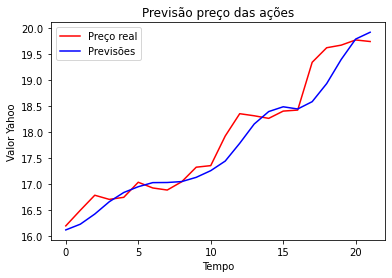

In [ ]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()